In [1]:
# import the library
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sea


In [2]:
# read the data using read_excel fun
Data = pd.read_excel("C:/Users/nxt-1/Desktop/Dataset/laptopData_after_cleaning.xlsx")

In [3]:
# set Labtop_ID as index to imporve the search performance
Data.set_index("Labtop_ID")

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
Labtop_ID,,,,,,,,,,,
0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298.0,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400
1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16.0,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200
1300.0,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200


In [4]:
for col in Data.columns:
        print(col , ":", len(Data[col].unique()), "  count unique value record")

Labtop_ID : 1274   count unique value record
Company : 20   count unique value record
TypeName : 7   count unique value record
Inches : 25   count unique value record
ScreenResolution : 41   count unique value record
Cpu : 119   count unique value record
Ram : 11   count unique value record
Memory : 41   count unique value record
Gpu : 107   count unique value record
OpSys : 10   count unique value record
Weight : 181   count unique value record
Price : 778   count unique value record


In [5]:
company_unique  = Data["Company"].unique()
_unique = Data["TypeName"].unique()
Cpu_unique = Data["Cpu"].unique()

In [7]:
len(company_unique)

20

In [2]:
test = pd.DataFrame(data={"a" : [1,2,3,4,5], "b" : [6,7,8,9,10], "c" : [11,12,13,14,15]})

In [26]:
test.itertuples[1]

TypeError: 'method' object is not subscriptable

In [21]:
# the diffrence between iloc is useful with number index and loc using with specfic the object indexing
for i in test.index:
    print(test.loc[i,'a'],test.loc[i,'b'],test.loc[i,'c'])

1 6 11
2 7 12
3 8 13
4 9 14
5 10 15


In [33]:
for i in test.itertuples("a"):
    print(i)

Pandas(Index=0, a=1, b=6, c=11)
Pandas(Index=1, a=2, b=7, c=12)
Pandas(Index=2, a=3, b=8, c=13)
Pandas(Index=3, a=4, b=9, c=14)
Pandas(Index=4, a=5, b=10, c=15)


1
7
13


IndexError: index 3 is out of bounds for axis 0 with size 3

In [8]:
for i in range(len(company_unique)):
    s = np.random.randint(0,len(company_unique),size=100)
    Company_list = np.array(company_unique[s]).ravel()

In [9]:
for i in range(len(TypeName_unique)):
    s = np.random.randint(0,len(TypeName_unique),size=100)
    TypeName_list = np.array(TypeName_unique[s]).ravel()

In [10]:
for i in range(len(Cpu_unique)):
    s = np.random.randint(0,len(Cpu_unique),size=100)
    CPU_list = np.array(Cpu_unique[s]).ravel()

In [5]:
# check for any null value
Data.isnull().sum()

Labtop_ID           30
Company             30
TypeName            30
Inches              31
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              31
Price               30
dtype: int64

In [6]:
# apply null value fun to drop 
Data.dropna(inplace=True)

In [7]:
# check for any null value after apply fun
Data.isnull().sum()

Labtop_ID           0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
# to see all unique values of Comapny column
Data["Company"].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [9]:
# Create LabelEncoder object to transform the category columns into numric columns
Label = preprocessing.LabelEncoder()

In [10]:
# find specific word in columns
i3 = np.array(Data["Cpu"][Data["Cpu"].str.contains("i3")])
i5 = np.array(Data["Cpu"][Data["Cpu"].str.contains("i5")])
i7 = np.array(Data["Cpu"][Data["Cpu"].str.contains("i7")])

In [11]:
Data["Cpu"].replace(i3,"i3",inplace=True)
Data["Cpu"].replace(i5,"i5",inplace=True)
Data["Cpu"].replace(i7,"i7",inplace=True)

In [12]:
i9 = ['AMD A9-Series 9420 3GHz',
       'Intel Core M m3 1.2GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Celeron Dual Core N3060 1.6GHz', 'AMD FX 9830P 3GHz',
       'AMD E-Series 6110 1.5GHz', 'Intel Core M 6Y75 1.2GHz',
       'AMD A6-Series 9220 2.9GHz', 'Intel Xeon E3-1505M V6 3GHz',
       'AMD E-Series 9000e 1.5GHz', 'AMD A10-Series A10-9620P 2.5GHz',
       'AMD A6-Series A6-9220 2.5GHz',
       'Intel Celeron Dual Core 3205U 1.5GHz',
       'AMD A10-Series 9600P 2.4GHz', 'AMD A8-Series 7410 2.2GHz',
       'Intel Celeron Dual Core 3855U 1.6GHz',
       'Intel Pentium Quad Core N3710 1.6GHz',
       'AMD A12-Series 9720P 2.7GHz', 'AMD A12-Series 9720P 3.6GHz',
       'Intel Celeron Quad Core N3450 1.1GHz',
       'Intel Celeron Dual Core N3060 1.60GHz', 'AMD Ryzen 1600 3.2GHz',
       'Intel Core M m3-7Y30 2.2GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'AMD A10-Series 9620P 2.5GHz', 'AMD E-Series 7110 1.8GHz',
       'Intel Celeron Dual Core N3350 2.0GHz',
       'AMD A9-Series A9-9420 3GHz', 'Intel Core M 7Y30 1.0GHz',
       'Intel Xeon E3-1535M v6 3.1GHz',
       'Intel Celeron Quad Core N3160 1.6GHz',
       'AMD E-Series E2-9000 2.2GHz',
       'Intel Celeron Dual Core N3050 1.6GHz',
       'Intel Core M M3-6Y30 0.9GHz', 'AMD A9-Series 9420 2.9GHz',
       'AMD A6-Series 7310 2GHz', 'Intel Atom Z8350 1.92GHz',
       'Intel Xeon E3-1535M v5 2.9GHz',
       'Intel Pentium Dual Core N4200 1.1GHz',
       'Intel Celeron Quad Core N3710 1.6GHz', 'Intel Core M 1.2GHz',
       'AMD A12-Series 9700P 2.5GHz',
       'Intel Pentium Dual Core 4405U 2.1GHz',
       'AMD A4-Series 7210 2.2GHz', 'Intel Core M m7-6Y75 1.2GHz',
       'AMD FX 8800P 2.1GHz', 'Intel Core M M7-6Y75 1.2GHz',
       'Intel Atom X5-Z8350 1.44GHz', 'Intel Core M 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Pentium Dual Core 4405Y 1.5GHz',
       'Intel Pentium Quad Core N3700 1.6GHz', 'Intel Core M 6Y54 1.1GHz',
       'Intel Celeron Dual Core N3350 2GHz',
       'Samsung Cortex A72&A53 2.0GHz', 'AMD E-Series 9000 2.2GHz',
       'Intel Core M 6Y30 0.9GHz', 'AMD A9-Series 9410 2.9GHz']

In [13]:
       Data["Cpu"].replace(i9,"i9",inplace=True)

In [14]:
# count for each row in new column that i created (CPU)
Data["Cpu"].value_counts().sort_values(ascending=False)

Cpu
i7    513
i5    410
i9    214
i3    134
Name: count, dtype: int64

In [16]:
# to see the distibution of data
Data["Inches"].describe()

count    1271.000000
mean       15.132258
std         1.954530
min        10.100000
25%        14.000000
50%        15.600000
75%        15.600000
max        35.600000
Name: Inches, dtype: float64

In [25]:
# take a copy of Inches and append in a test column.
Inches_Size = np.array(Data["Inches"])

In [26]:
# created bins and label to convert the Inches column from numric into category using pd.cut funcation 
bins = [0,10,15,35]
lable = ["Small-Size","Mid-Size","Large-Size"]

In [27]:
# apply function 
Inches_Size = pd.cut(Inches_Size,bins=bins,labels=lable)

In [28]:
# named the new var as Inches-Size
Data["Inches-Size"] = Inches_Size

<AxesSubplot: xlabel='Inches-Size'>

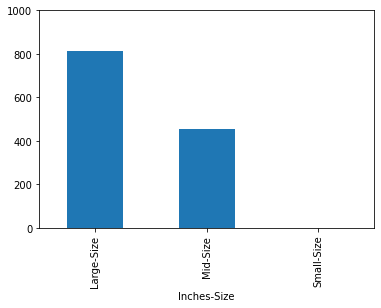

In [34]:
# value count for Lable_Inches and plot at as bar chart
Data["Inches-Size"].value_counts().sort_values(ascending=False).plot(kind="bar",ylim=[0,1000])

In [35]:
# convert the category columns into numric columns so can the machine learning models understand the data
Lable_Cpu_type = Label.fit_transform(Data["Cpu"])
Lable_Company = Label.fit_transform(Data["Company"])
Lable_TypeName = Label.fit_transform(Data["TypeName"])
Lable_OpSys = Label.fit_transform(Data["OpSys"])
Lable_Inches = Label.fit_transform(Data["Inches-Size"])
# add my new four columns to my data 
Data["Lable_Cpu_type"] = Lable_Cpu_type 
Data ["Lable_Company"] = Lable_Company
Data["Lable_OpSys"] = Lable_OpSys
Data["Lable_TypeName"] = Lable_TypeName
Data["Lable_Inches"] = Lable_Inches

In [36]:
# Divide the data into X column (independet var) and y for (dependet var)
Features = ["Lable_Company","Lable_TypeName","Lable_Cpu_type","Lable_OpSys","Weight","Ram","Inches","Lable_Inches"]
x = Data[Features]
y = Data["Price"]

In [32]:
x.corr()

,Lable_Company,Lable_TypeName,Lable_Cpu_type,Lable_OpSys,Weight,Ram,Inches,Lable_Inches
Lable_Company,1.000000,-0.006335,-0.020617,0.140182,-0.121868,0.047084,-0.043164,0.143253
Lable_TypeName,-0.006335,1.000000,-0.089878,0.081054,-0.207945,-0.200407,-0.060210,0.054227
Lable_Cpu_type,-0.020617,-0.089878,1.000000,-0.090317,-0.022132,0.144093,-0.063875,0.047605
Lable_OpSys,0.140182,0.081054,-0.090317,1.000000,0.008420,0.126500,0.020497,0.062854
Weight,-0.121868,-0.207945,-0.022132,0.008420,1.000000,0.283294,0.494972,-0.557665
Ram,0.047084,-0.200407,0.144093,0.126500,0.283294,1.000000,0.142125,-0.072257
Inches,-0.043164,-0.060210,-0.063875,0.020497,0.494972,0.142125,1.000000,-0.556249
Lable_Inches,0.143253,0.054227,0.047605,0.062854,-0.557665,-0.072257,-0.556249,1.000000


In [37]:
# split the data into X_train,X_test,Y_train,Y_test
X_train,X_test,Y_train,Y_test = train_test_split(x,y,train_size=0.25)

In [40]:
# craete three model to see the diffrence score or accurate model between three model:
# 1- Linear Regression Model 
# 2- Decision Tree Regressor Model
# 3- SVR (stand for Spport vactor machine regression)
Model_DT_v1 = DecisionTreeRegressor(criterion="squared_error",splitter="best",max_features="sqrt")
Model_SVR_v1 = SVR(kernel="linear",degree=1,gamma="scale")

In [41]:
Model_LR_v2 = LinearRegression(fit_intercept=True,positive=True)
Model_DT_v2 = DecisionTreeRegressor(criterion="absolute_error",splitter="random",max_features="log2")
Model_SVR_v2 = SVR(kernel="poly",degree=2,gamma="auto")

In [42]:
Model_LR_v3 = LinearRegression(fit_intercept=False,positive=False)
Model_DT_v3 = DecisionTreeRegressor(criterion="poisson",splitter="best",max_features="sqrt")
Model_SVR_v3 = SVR(kernel="rbf",degree=3,gamma="auto")

In [43]:
# fit Linear Regression Model
Model_LR_v2.fit(X_train,Y_train)
Model_LR_v3.fit(X_train,Y_train)

LinearRegression(fit_intercept=False)

In [44]:
# fit Decision Tree Regressor Model
Model_DT_v1.fit(X_train,Y_train)
Model_DT_v2.fit(X_train,Y_train)
Model_DT_v3.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='poisson', max_features='sqrt')

In [45]:
# fit SVR model
Model_SVR_v1.fit(X_train,Y_train)
Model_SVR_v2.fit(X_train,Y_train)
Model_SVR_v3.fit(X_train,Y_train)

SVR(gamma='auto')

In [46]:
print("The score of Linear Regression v2 are : ",Model_LR_v2.score(X_test,Y_test)*100)
print("The score of Decision Tree Regressor v1  : ",Model_DT_v1.score(X_test,Y_test)*100)
print("The score type of SVR v1 are :",Model_SVR_v1.score(X_test,Y_test)*100)

The score of Linear Regression v2 are :  52.4564068173035
The score of Decision Tree Regressor v1  :  56.906704103396336
The score type of SVR v1 are : 15.289793973986999


In [47]:
print("The score of Linear Regression v3 are : ",Model_LR_v3.score(X_test,Y_test)*100)
print("The score of Decision Tree Regressor v2  : ",Model_DT_v2.score(X_test,Y_test)*100)
print("The score type of SVR v2 are :",Model_SVR_v2.score(X_test,Y_test)*100)

The score of Linear Regression v3 are :  52.79915180128333
The score of Decision Tree Regressor v2  :  45.56850102138118
The score type of SVR v2 are : 41.49540462693436


In [48]:
print("The score of Linear Regression v3 are : ",Model_LR_v3.score(X_test,Y_test)*100)
print("The score of Decision Tree Regressor v3  : ",Model_DT_v2.score(X_test,Y_test)*100)
print("The score type of SVR v3 are :",Model_SVR_v3.score(X_test,Y_test)*100)

The score of Linear Regression v3 are :  52.79915180128333
The score of Decision Tree Regressor v3  :  45.56850102138118
The score type of SVR v3 are : -0.25304622787696296
